In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

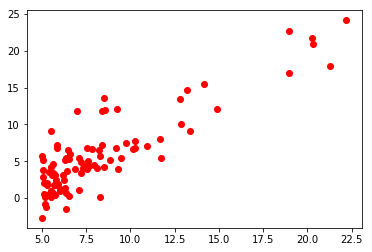

In [104]:
dataset = pd.read_csv("ex1data1.txt")
X = dataset.iloc[:,0:1].values #Ev metrekarelerinin olduğu matrix (bu datada feet kullanılmış metre yerine) boyutu Ev SayısıX1
Y = dataset.iloc[:,1:].values # Ev fiyatları ( Gerçek değeri / 1000 şeklinde yer alıyor veride) boyutu Ev sayısıX1
theta = np.zeros((2,1)) # Hipotezde kullanılacak olan teta 0 ve teta 1 i vektör halinde yazıyoruz.
X_plot = dataset.iloc[:,0:1].values #plotlamak için kullanacağımız x
X = np.append(np.ones((X.shape[0],1)).astype(int),values = X,axis=1) #theta 0 için Xin başına 1lerden oluşan 
#bir adet sütun vektörü eklemeliyiz. Boyut EvSayısıx2 oldu.
m = X.shape[0] # Ev sayısı
J_history = [] #Cost fonksiyonun nasıl değiştiğini gözlemlemek için
alpha = 0.01#Learning rate dediğimiz türevi küçültmek için kullanılan katsayı istediğiniz gibi oynayıp gözlemleyebilirsiniz.
plt.figure()#Veri kümemizi inceleyelim x eksenimiz Evin metrekaresi Y eksenimiz dolar/1000 cinsinden evlerin fiyatları.
plt.scatter(X_plot,Y,c="r")
num_iters = 400 #Gradient descenti kaç kere uygulayacağınız Yine bununla istediğiniz kadar oynayıp gözlem yapabilirsiniz.

In [105]:
def computeCost(J_history,m,X,Y,theta):#Costu hesaplayan fonksiyonumuz.
    preds = np.matmul(X,theta) # X EvSayısıx2 lik bir matrixti theta ise 2X1lik bir matrix(vektör de diyebilirsiniz)
    #Matrix çarpımının tanımını izlerseniz mXn lik bir matrixi nXt lik bir matrixle çarptığınızda size mXt lik bir matrix döner.
    #Bu matrix Çarpımının sonucuda EvSayısıx1 olur.Aslında bu matrix çarpımıyla yaptığımız şey tüm evler için hipotezin verdiği
    #değeri bulmak.Yani theta0 + theta1.Metrekare nin bize verdiği sonucu bulmuş oluyoruz.
    diffrence =np.square( preds - Y) #Formüldeki kare kısmı için direk matrixin element-wise karesini alabiliyoruz np.square ile.
    J = (1/(2*m)) * np.sum(diffrence)#Yine formülden gelen tüm evler için yapılan tahminlerin gerçek fiyatlardan farklarının toplamı
    #nın ev sayısı toplamına bölümü bize average costu verecektir.
    J_history.append(J)
    return J

In [106]:
def computeGradients(theta,X,Y,m):#Gradientleri compute ettiğimiz fonksiyon
    preds = np.matmul(X,theta)#Yine yukarıdaki gibi matrix multiplication ile bilgisayarın yaptığı tahminlerin matrixini çıkartıyoruz.
    diffrence = 1/m *(preds -Y)#Yine bilgisayarın yaptığı tahminden gerçek tahminleri çıkarıyoruz.
    grads = np.matmul(np.transpose(X),diffrence)#Türev formülünü uyguluyoruz.Burda yaptığımız şey fonksiyonXiçinin türevi
    #2x96 olması için X in transposeunu alıyoruz.96x2 lik bir matrixi 2x96lık yapıyor diffrence = 96x1 vector mxnXnxt mxt
    #sonuç 2x1lik bir gradeint değeri
    return grads
    

In [107]:
def train(num_iters,alpha,X,Y,theta,J_history,m):#Gradient descenti uyguladığımız thetayı bulduğumuz fonksiyon
    
    for i in range(num_iters):
        grads = computeGradients(theta,X,Y,m)
        theta = theta - alpha *grads
        computeCost(J_history,m,X,Y,theta)#Costların logunu tutmak için
        if(i % 50 == 0): #Her 50 iterationda bir Line'ın nasıl değiştiğini gözlemleyelim.
            plt.clf()
            plt.figure()
            plt.scatter(X_plot,Y,c= "b")
            preds = np.matmul(X,theta)
            plt.plot(X_plot[:,0],preds,c="r")
            plt.pause(0.000001)

    plt.clf()
    plt.figure()
    plt.plot([i for i in range(num_iters)],J_history)#Gradient descentin Costumuzu
    plt.xlabel("Num_iters")
    plt.ylabel("Cost")
    return theta

<Figure size 432x288 with 0 Axes>

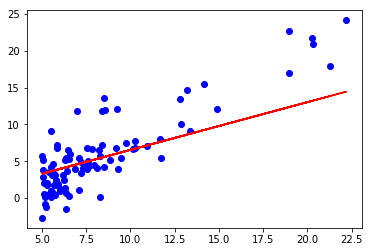

<Figure size 432x288 with 0 Axes>

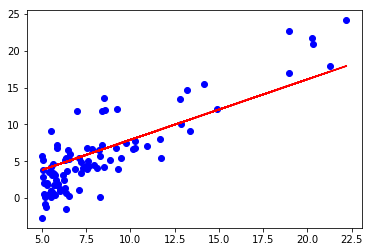

<Figure size 432x288 with 0 Axes>

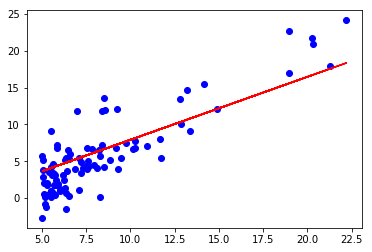

<Figure size 432x288 with 0 Axes>

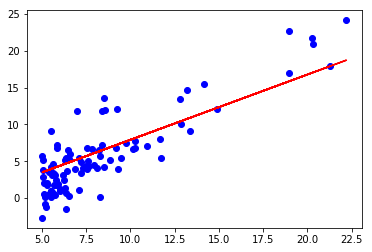

<Figure size 432x288 with 0 Axes>

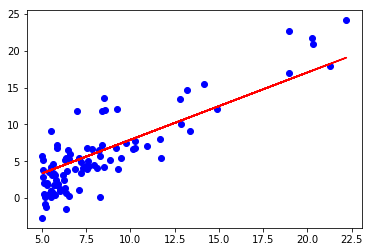

<Figure size 432x288 with 0 Axes>

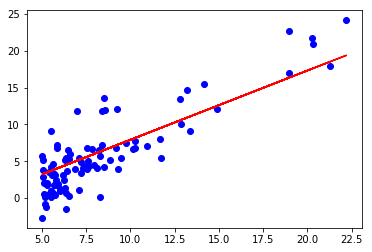

<Figure size 432x288 with 0 Axes>

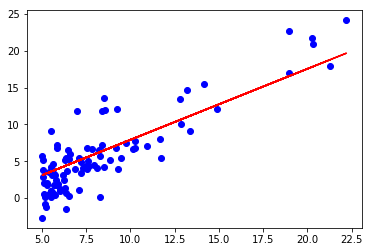

<Figure size 432x288 with 0 Axes>

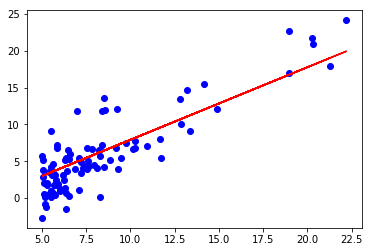

<Figure size 432x288 with 0 Axes>

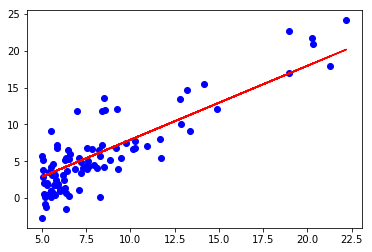

<Figure size 432x288 with 0 Axes>

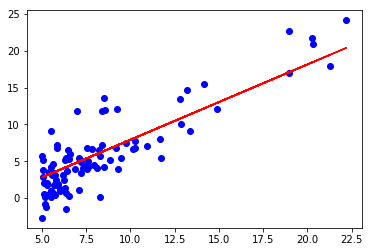

<Figure size 432x288 with 0 Axes>

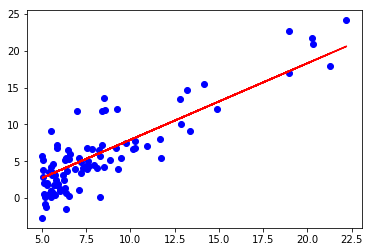

<Figure size 432x288 with 0 Axes>

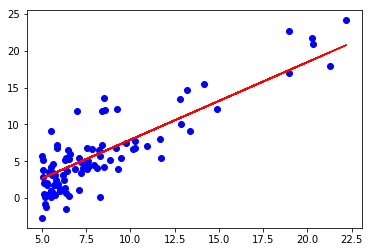

<Figure size 432x288 with 0 Axes>

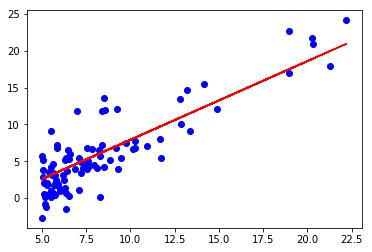

<Figure size 432x288 with 0 Axes>

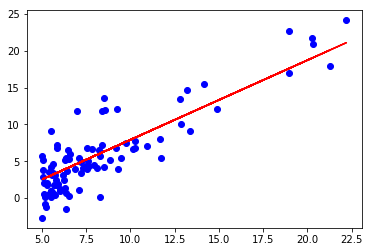

<Figure size 432x288 with 0 Axes>

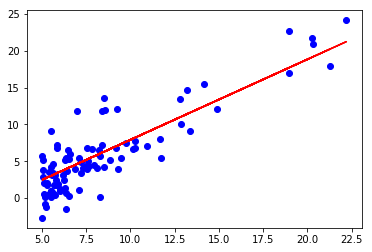

<Figure size 432x288 with 0 Axes>

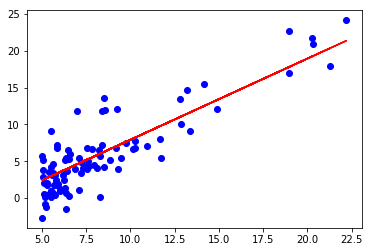

<Figure size 432x288 with 0 Axes>

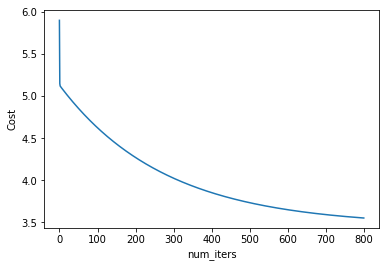

In [108]:
J_history = []
theta = train(800,alpha,X,Y,theta,J_history,m)

<Figure size 432x288 with 0 Axes>

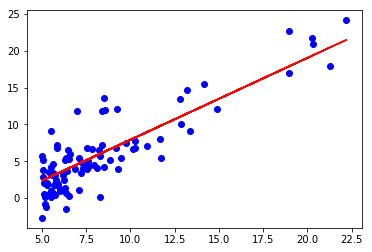

In [109]:
plt.clf()
plt.figure()
plt.scatter(X_plot,Y,c= "b")
preds = np.matmul(X,theta)
plt.plot(X_plot[:,0],preds,c="r")
plt.show()